In [29]:
import pandas as pd
dfuc = pd.read_csv("udemy_courses.csv")
dfuc.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


Comenzamos por cargar los datos

In [2]:
dfuc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [3]:
#cambio el tipo de dato en course_id y en published_timestamp
dfuc['course_id'] = dfuc['course_id'].astype(str)
dfuc['published_timestamp'] = pd.to_datetime(dfuc['published_timestamp'])

Realizo modificaciones en cuanto al tipo de dato en las columnas "course_id" y "published_timestamp"

In [30]:
# aqui trabajamos con la columna published_timestamp donde la separamos y creamos columnas por fecha y horas
dfuc['published_timestamp'] = pd.to_datetime(dfuc['published_timestamp'])
dfuc['published_date'] = dfuc['published_timestamp'].dt.strftime('%Y-%m-%d')
dfuc['published_time'] = dfuc['published_timestamp'].dt.strftime('%H:%M:%S')

dfuc.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_time
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18,20:58:58
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09,16:34:20
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19,19:26:30


En este paso separo la fecha y hora de la columna "published_timestamp"

In [5]:
#elimino columna published_timestamp y paso de object a datatime la columna published_date
dfuc = dfuc.drop('published_timestamp', axis=1)
dfuc['published_date'] = pd.to_datetime(dfuc['published_date'], format='%Y-%m-%d')

Elimino la columna "published_timestamp" y cambio el tipo de dato de la nueva columna "published_date".

In [32]:
# verifico si tengo duplicados y los elimino
duplicados = dfuc.duplicated()
filas_duplicadas = dfuc[duplicados]
print("Filas duplicadas:")
filas_duplicadas


Filas duplicadas:


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,published_time
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance,2016-05-16,18:28:30
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017-04-23,16:19:01
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance,2016-12-15,14:56:17
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance,2017-07-02,14:29:35
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design,2014-04-15,21:48:55
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development,2013-01-03,00:55:31


In [33]:
# elimino dichas filas duplicadas
dfucnuevo = dfuc.drop_duplicates()

Se eliminan las filas que están repetidas

In [34]:
#verifico nulos
nulos = dfucnuevo.isnull().sum()
print(nulos)

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
published_date         0
published_time         0
dtype: int64


In [35]:
dfucnuevo.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
published_date                      object
published_time                      object
dtype: object

In [36]:
estadisticas = dfucnuevo[['price', 'num_subscribers', 'num_reviews', 'content_duration']].describe().round()
estadisticas

,price,num_subscribers,num_reviews,content_duration
count,3672.0,3672.0,3672.0,3672.0
mean,66.0,3191.0,156.0,4.0
std,61.0,9488.0,936.0,6.0
min,0.0,0.0,0.0,0.0
25%,20.0,112.0,4.0,1.0
50%,45.0,912.0,18.0,2.0
75%,95.0,2549.0,67.0,4.0
max,200.0,268923.0,27445.0,78.0


Podemos observar el promedio en cuanto al precio, número de subcriptores, numero de reseñas y el contenido de duración (Hs).

In [37]:
estadisticas_sincursosgratis = dfucnuevo[dfucnuevo['price'] > 0][['price', 'num_subscribers', 'num_reviews', 'content_duration']].describe().round()
estadisticas_sincursosgratis

,price,num_subscribers,num_reviews,content_duration
count,3362.0,3362.0,3362.0,3362.0
mean,72.0,2421.0,132.0,4.0
std,60.0,6326.0,927.0,6.0
min,20.0,0.0,0.0,0.0
25%,25.0,90.0,4.0,2.0
50%,50.0,736.0,15.0,2.0
75%,100.0,2058.0,53.0,4.0
max,200.0,121584.0,27445.0,78.0


Aqui no tenemos en cuenta aquellos cursos que son gratis, queremos calcular el promedio de
 aquellos cursos que son pagos.
 Como se puede observar varian un poco los promedios si solo consideramos los cursos que se pagan.

In [38]:
#Cantidad de cursos
cantidad_cursos_diferentes = dfucnuevo['course_title'].nunique()
print("Cantidad de cursos diferentes:", cantidad_cursos_diferentes)


Cantidad de cursos diferentes: 3663


In [39]:
#cantidad de cursos gratis
cursos_gratis = dfucnuevo[dfucnuevo['price'] == 0]['course_id'].nunique()
print("Cantidad de cursos gratuitos: ", cursos_gratis)

Cantidad de cursos gratuitos:  310


In [40]:
total_alumnos = dfucnuevo['num_subscribers'].sum()
print("Cantidad total de alumnos:", total_alumnos)
total_alumnos_cg = dfucnuevo[dfucnuevo['price'] == 0]['num_subscribers'].sum()
print("Cantidad total de alumnos en cursos gratuitos: ", total_alumnos_cg)

Cantidad total de alumnos: 11715835
Cantidad total de alumnos en cursos gratuitos:  3575525


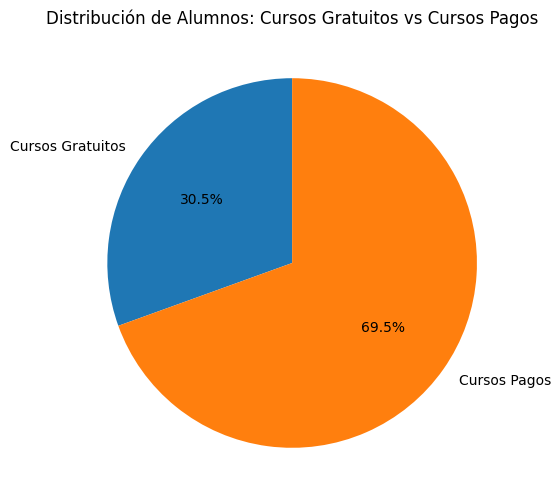

In [41]:
import matplotlib.pyplot as plt
# Calcular la cantidad total de alumnos en cursos gratuitos y cursos pagos
total_alumnos_gratis = dfucnuevo[dfucnuevo['price'] == 0]['num_subscribers'].sum()
total_alumnos_pagos = dfucnuevo[dfucnuevo['price'] > 0]['num_subscribers'].sum()

# lista con los datos para el gráfico de torta
datos = [total_alumnos_gratis, total_alumnos_pagos]
etiquetas = ['Cursos Gratuitos', 'Cursos Pagos']

plt.figure(figsize=(6, 6))
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Alumnos: Cursos Gratuitos vs Cursos Pagos')
plt.show()

A travez de este gráfico de tortas se puede observar con claridad que si bien la mayoria de los cursos son pagos, tenemos una cantidad considerable de cursos gratis

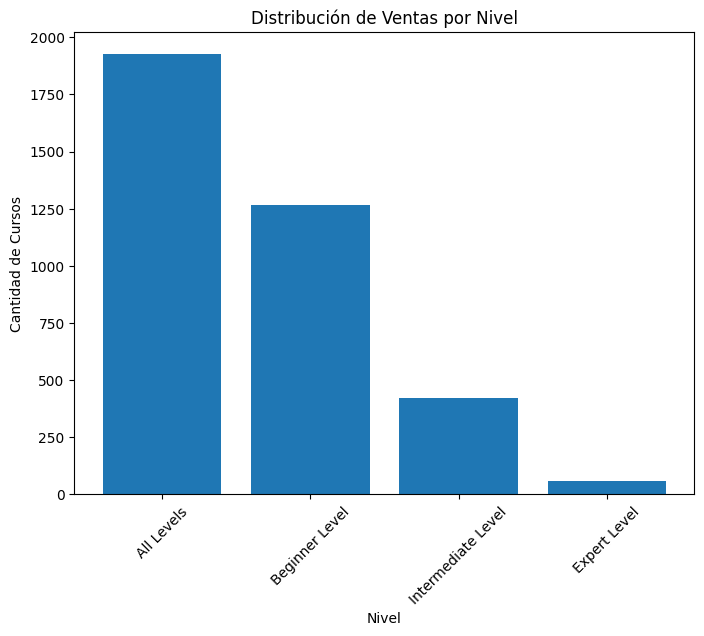

In [45]:
# Distribución de Nivel
level_counts = dfucnuevo['level'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(level_counts.index, level_counts.values)
plt.xlabel('Nivel')
plt.ylabel('Cantidad de Cursos')
plt.title('Distribución de Ventas por Nivel')
plt.xticks(rotation=45)
plt.show()

Se puede observar la demanda de los cursos en relacion al nivel de los mismos.

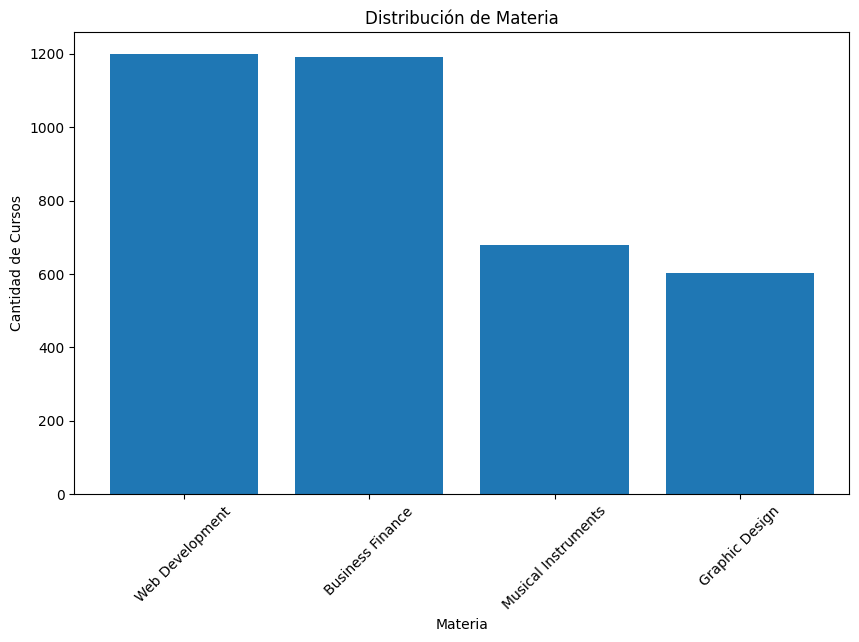

In [17]:
# Distribución de la variable "subject" : asignatura o materia
subject_counts = dfucnuevo['subject'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(subject_counts.index, subject_counts.values)
plt.xlabel('Materia')
plt.ylabel('Cantidad de Cursos')
plt.title('Distribución de Materia')
plt.xticks(rotation=45)
plt.show()

Distribución de los cursos de acuerdo a la materia o asignatura.

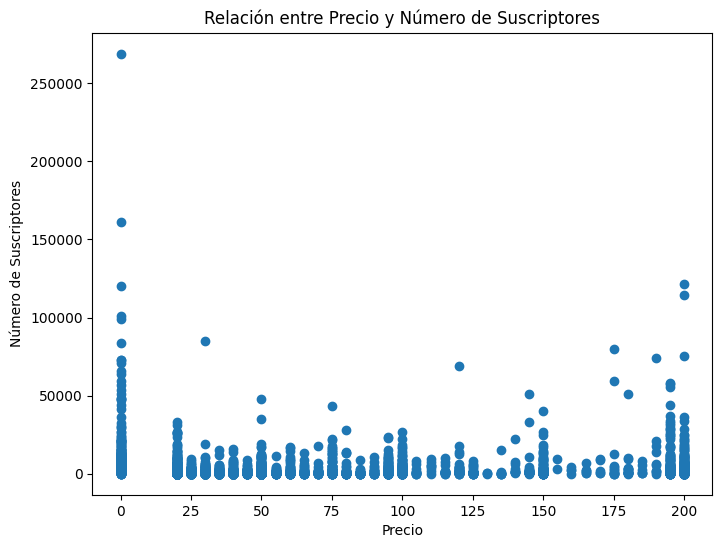

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear un gráfico de dispersión para comparar precio vs. número de suscriptores
plt.figure(figsize=(8, 6))
plt.scatter(dfucnuevo['price'], dfucnuevo['num_subscribers'])
plt.xlabel('Precio')
plt.ylabel('Número de Suscriptores')
plt.title('Relación entre Precio y Número de Suscriptores')
plt.show()

In [47]:
# aqui puedo saber cual es el curso con la mayor cantidad de subcripciones 
max_subscribers_index = dfucnuevo['num_subscribers'].idxmax()
max_subscribers_course = dfucnuevo.loc[max_subscribers_index, 'course_title']
max_subscribers_count = dfucnuevo.loc[max_subscribers_index, 'num_subscribers']

print("El curso con la mayor cantidad de alumnos es:", max_subscribers_course)
print("La cantidad de alumnos es:", max_subscribers_count)

El curso con la mayor cantidad de alumnos es: Learn HTML5 Programming From Scratch
La cantidad de alumnos es: 268923


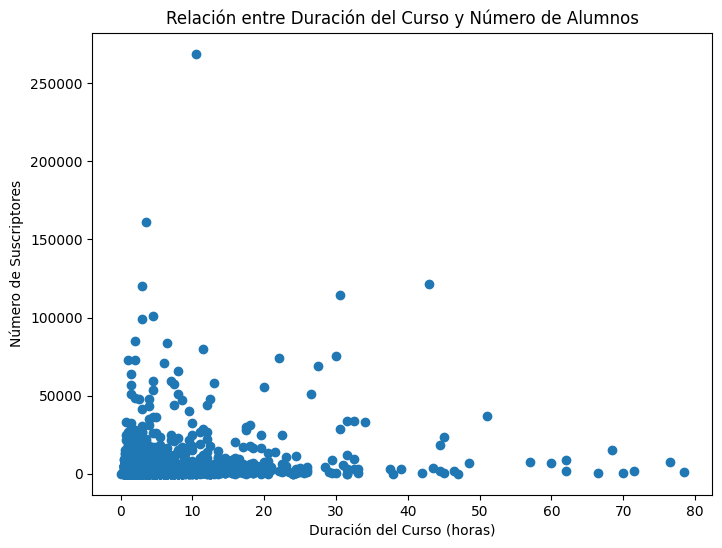

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(dfucnuevo['content_duration'], dfucnuevo['num_subscribers'])
plt.xlabel('Duración del Curso (horas)')
plt.ylabel('Número de Suscriptores')
plt.title('Relación entre Duración del Curso y Número de Alumnos')
plt.show()
# creo otro diagrama de dispercion para relacionar las horas con los suscriptores

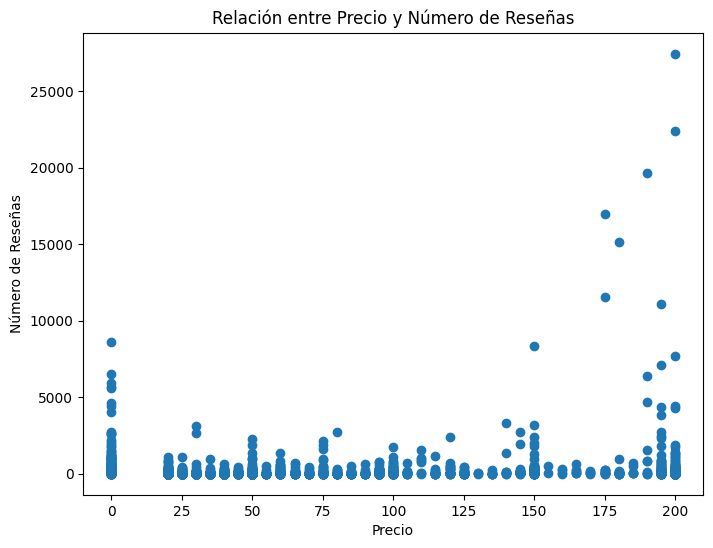

In [49]:
#gráfico de dispersión del precio vs. número de revisiones
plt.figure(figsize=(8, 6))
plt.scatter(dfucnuevo['price'], dfucnuevo['num_reviews'])
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.title('Relación entre Precio y Número de Reseñas')
plt.show()


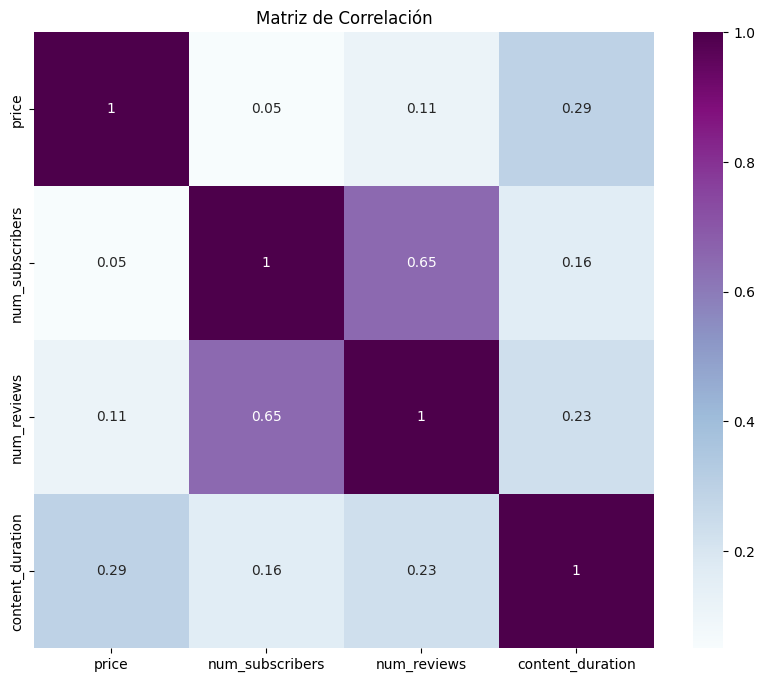

In [50]:
# Calcular la matriz de correlación
correlation_matrix = dfucnuevo[['price', 'num_subscribers', 'num_reviews', 'content_duration']].corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Matriz de Correlación')
plt.show()

De acuerdo a la matriz de correlacion teniendo en cuenta todos los cursos, tenemos una correlación nula entre el precio y el numero de suscriptores. 

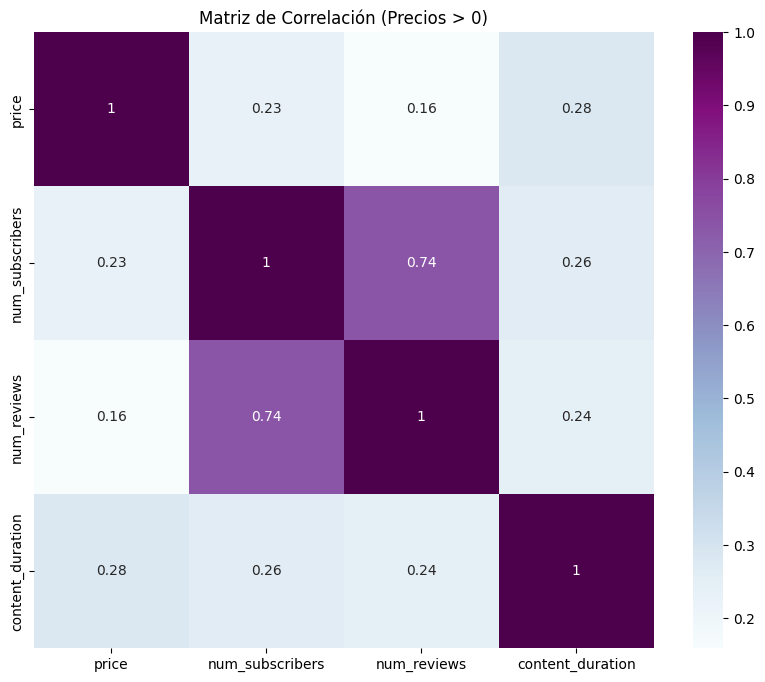

In [55]:
# Filtrar cursos con precios mayores a cero
dfucnuevo_filtered = dfucnuevo[dfucnuevo['price'] > 0]

# Calcular la matriz de correlación en el subconjunto filtrado
correlation_matrix = dfucnuevo_filtered[['price', 'num_subscribers', 'num_reviews', 'content_duration']].corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Matriz de Correlación (Precios > 0)')
plt.show()

En cambio si no consideramos los cursos gratis, la correlacion que existe entre el precio y el numero de suscriptores es débil pero no nula; tambien cambian las correlacion con respecto al numero de reseñas de ser moderadas pasana a ser significativas.

Esto permite visualizar la distribución de las ventas en diferentes rangos de precios y niveles.

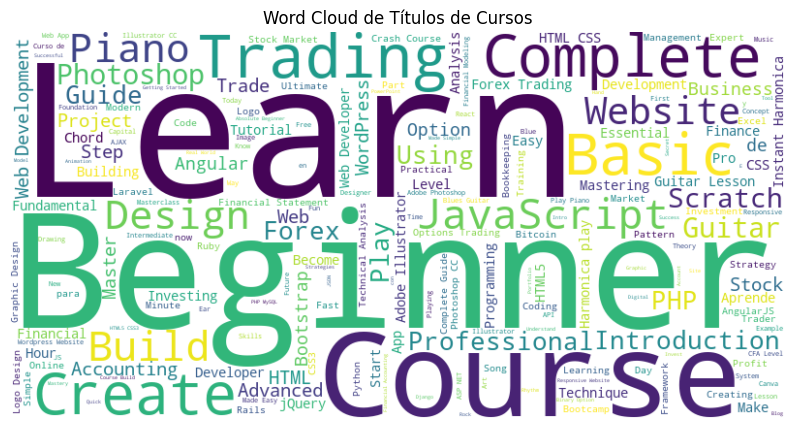

In [57]:
from wordcloud import WordCloud

text = ' '.join(dfucnuevo['course_title'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Títulos de Cursos')
plt.show()


Palabras mas frecuentes de nuestro conjunto de datos, en relacion al titulo del curso.

In [35]:
# dfucnuevo.to_csv('Udemy.csv', index=False)

In [27]:
dfucnuevo

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date,published_time,price_range
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18,20:58:58,High
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09,16:34:20,Medium
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19,19:26:30,Low
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017-05-30,20:07:24,Medium
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016-12-13,14:57:18,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,Web Development,2016-06-14,17:36:46,Medium
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,Web Development,2017-03-10,22:24:30,Low
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,Web Development,2015-12-30,16:41:42,Low
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,Web Development,2016-08-11,19:06:15,Low
